In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/myBexa/Data

/content/drive/My Drive/myBexa/Data


In [3]:
import requests
import cv2
import matplotlib.pyplot as plt
import glob
import random
import os

In [4]:
# Function to convert bounding boxes in YOLO format to xmin, ymin, xmax, ymax.
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

In [5]:
def plot_box(image, bboxes, labels):
    # Need the image height and width to denormalize
    # the bounding box coordinates
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        # Denormalize the coordinates.
        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)

        thickness = max(2, int(w/275))

        cv2.rectangle(
            image,
            (xmin, ymin), (xmax, ymax),
            color=(0, 0, 255),
            thickness=thickness
        )
    return image

In [6]:
# Function to plot images with the bounding boxes.
def plot(image_paths, label_paths, num_samples):
    all_images = []
    all_images.extend(glob.glob(image_paths+'/*.jpg'))
    all_images.extend(glob.glob(image_paths+'/*.JPG'))

    all_images.sort()

    num_images = len(all_images)

    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image_name = all_images[j]
        image_name = '.'.join(image_name.split(os.path.sep)[-1].split('.')[:-1])
        image = cv2.imread(all_images[j])
        with open(os.path.join(label_paths, image_name+'.txt'), 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            print(label_lines)
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line[2:]
                print(bbox_string)
                x_c, y_c, w, h = bbox_string.split(' ')
                print(x_c)
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=1)
    plt.tight_layout()
    plt.show()

In [ ]:
# Visualize a few training images.
plot(
    image_paths='train/images/',
    label_paths='train/labels/',
    num_samples=4,
)

In [7]:
%cd /content/drive/My Drive/myBexa/Data

/content/drive/My Drive/myBexa/Data


In [44]:
%%writefile pothole_v8.yaml
# path: 'data/'
train: '/content/drive/My Drive/myBexa/Data/train/images'
val: '/content/drive/My Drive/myBexa/Data/valid/images'

# class names
names:
  0: 'infected'

Overwriting pothole_v8.yaml


In [ ]:
!pip install ultralytics

In [47]:
# Sample training for 5 epoch.
# EPOCHS = 5
!yolo task=detect mode=train model=yolov8n.pt imgsz=1280 data=pothole_v8.yaml epochs={100} batch=8 name=yolov8n_v8_50e

Ultralytics YOLOv8.0.135 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=pothole_v8.yaml, epochs=100, patience=50, batch=8, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_v8_50e, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynami

In [48]:
!yolo task=detect mode=val model=runs/detect/yolov8n_v8_50e/weights/best.pt name=yolov8n_eval data=pothole_v8.yaml

Ultralytics YOLOv8.0.135 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/drive/My Drive/myBexa/Data/valid/labels.cache... 35 images, 0 backgrounds, 0 corrupt: 100% 35/35 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:04<00:00,  1.44s/it]
                   all         35         44      0.732      0.659      0.673      0.433
Speed: 17.6ms preprocess, 53.9ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/yolov8n_eval


In [50]:
!yolo task=detect \
mode=predict \
model=runs/detect/yolov8n_v8_50e/weights/best.pt \
source='/content/drive/My Drive/myBexa/Data/valid/images' \
imgsz=1280 \
name=yolov8n_v8_50e_infer1280 \
hide_labels=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.0.135 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

image 1/35 /content/drive/My Drive/myBexa/Data/valid/images/Y166.JPG: 1280x1120 (no detections), 104.6ms
image 2/35 /content/drive/My Drive/myBexa/Data/valid/images/Y167.JPG: 1280x1024 1 infected, 96.0ms
image 3/35 /content/drive/My Drive/myBexa/Data/valid/images/Y168.jpg: 1280x1152 (no detections), 96.4ms
image 4/35 /content/drive/My Drive/myBexa/Data/valid/images/Y169.jpg: 1280x1024 1 infected, 15.9ms
image 5/35 /content/drive/My Drive/myBexa/Data/valid/images/Y170.JPG: 1280x1056 1 infected, 97.6ms
image 6/35 /content/drive/My Drive/myBexa/Data/valid/images/Y180.jpg: 1280x1024 1 infected, 16.7ms
image 7/35 /content/drive/My Drive/myBexa/Data/valid/images/Y181.jpg: 1280x1056 1 infected, 18.6ms
image 8/35 

In [51]:
# Plot and visualize images in a 2x2 grid.
def visualize(result_dir, num_samples=4):
    """
    Function accepts a list of images and plots
    them in a 2x2 grid.
    """
    plt.figure(figsize=(20, 12))
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    random.shuffle(image_names)
    for i, image_name in enumerate(image_names):
        image = plt.imread(image_name)
        plt.subplot(2, 2, i+1)
        plt.imshow(image)
        plt.axis('off')
        if i == num_samples-1:
            break
    plt.tight_layout()
    plt.show()

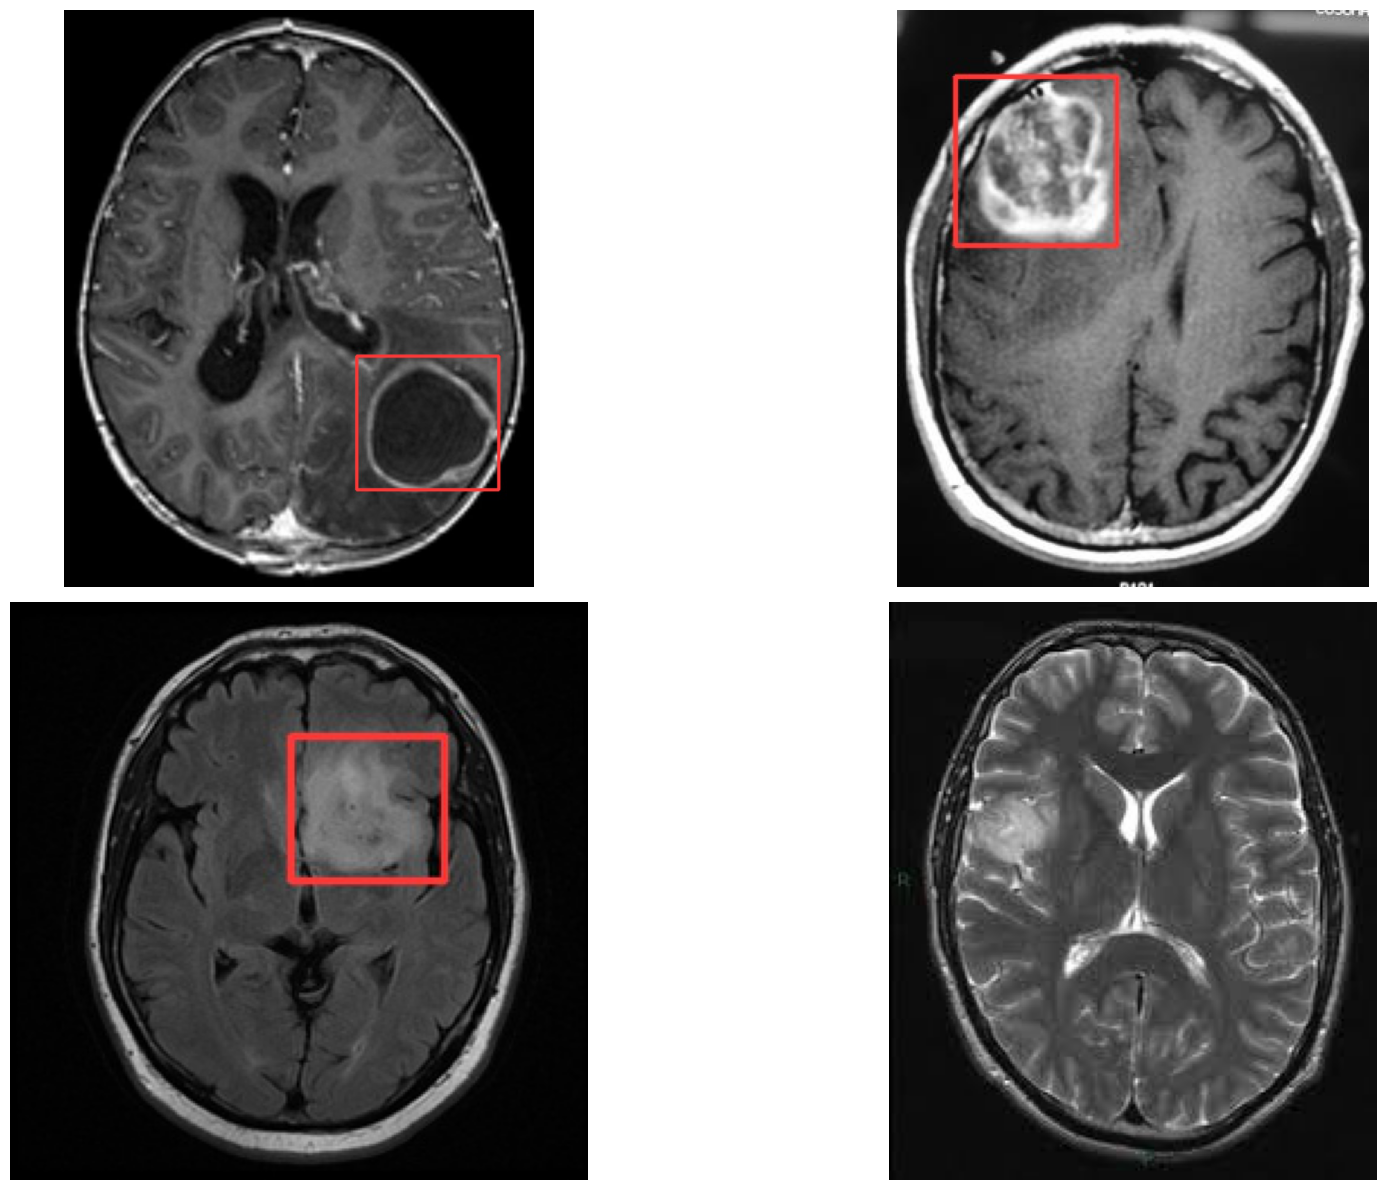

In [58]:
visualize('runs/detect/yolov8n_v8_50e_infer12802/')